##**In this Project we going to build Leaf Disease Classification using Deep CNN with the classes of: `Early`, `Blight`, `Healthy`, `Late Blight`**.

In [3]:
# Import Dependencies
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##**Load Data**

In [4]:
import zipfile
zip = zipfile.ZipFile('/content/archive.zip','r')
zip.extractall('/content')
zip.close()

In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/Potato/Train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

test_data = tf.keras.utils.image_dataset_from_directory(
    '/content/Potato/Test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

val_data = tf.keras.utils.image_dataset_from_directory(
    '/content/Potato/Valid',
    labels =  'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

Found 900 files belonging to 3 classes.
Found 300 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [7]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
train_data_iterator = train_data.as_numpy_iterator()
train_data_iterator

In [9]:
batch = train_data_iterator.next()

In [10]:
batch[0].shape

(32, 224, 224, 3)

In [11]:
batch[0][0]

array([[[206.88776 , 208.88776 , 220.88776 ],
        [207.68878 , 209.68878 , 221.68878 ],
        [205.03572 , 207.03572 , 219.03572 ],
        ...,
        [170.77547 , 173.77547 , 192.77547 ],
        [179.0205  , 182.0205  , 201.0205  ],
        [184.23474 , 187.23474 , 206.23474 ]],

       [[201.7347  , 203.7347  , 215.7347  ],
        [209.68367 , 211.68367 , 223.68367 ],
        [207.11224 , 209.11224 , 221.11224 ],
        ...,
        [171.95921 , 174.95921 , 193.95921 ],
        [177.41841 , 180.41841 , 199.41841 ],
        [177.71426 , 180.71426 , 199.71426 ]],

       [[192.5     , 194.5     , 206.5     ],
        [205.72958 , 207.72958 , 219.72958 ],
        [204.40306 , 206.40306 , 218.40306 ],
        ...,
        [178.26538 , 181.26538 , 200.26538 ],
        [179.5357  , 182.5357  , 201.5357  ],
        [181.27045 , 184.27045 , 203.27045 ]],

       ...,

       [[108.55081 , 109.55081 , 127.55081 ],
        [114.90833 , 115.90833 , 133.90834 ],
        [109.24989 , 1

In [12]:
tf.reduce_min(batch[0][0]), tf.reduce_max(batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=254.68356>)

In [13]:
# Checking at a test batch
test_data_iterator = test_data.as_numpy_iterator()
test_batch = test_data_iterator.next()

In [14]:
test_batch[0][0]

array([[[136.67857 , 133.67857 , 142.67857 ],
        [177.16837 , 174.16837 , 183.16837 ],
        [170.89287 , 167.89287 , 176.89287 ],
        ...,
        [180.85207 , 178.85207 , 189.85207 ],
        [183.32654 , 181.32654 , 192.32654 ],
        [183.91837 , 181.91837 , 192.91837 ]],

       [[153.43878 , 150.43878 , 159.43878 ],
        [147.08675 , 144.08675 , 153.08675 ],
        [137.50511 , 134.50511 , 143.50511 ],
        ...,
        [187.72453 , 185.72453 , 196.72453 ],
        [192.16328 , 190.16328 , 201.16328 ],
        [194.58676 , 192.58676 , 203.58676 ]],

       [[153.66325 , 150.66325 , 159.66325 ],
        [147.46939 , 144.46939 , 153.46939 ],
        [128.37755 , 125.377556, 134.37755 ],
        ...,
        [185.01022 , 183.01022 , 194.01022 ],
        [186.30103 , 184.30103 , 195.30103 ],
        [186.43367 , 184.43367 , 195.43367 ]],

       ...,

       [[132.91348 , 133.91348 , 151.91348 ],
        [135.64812 , 136.64812 , 154.64812 ],
        [142.94911 , 1

In [15]:
tf.reduce_min(test_batch[0][0]), tf.reduce_max(test_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=226.61246>)

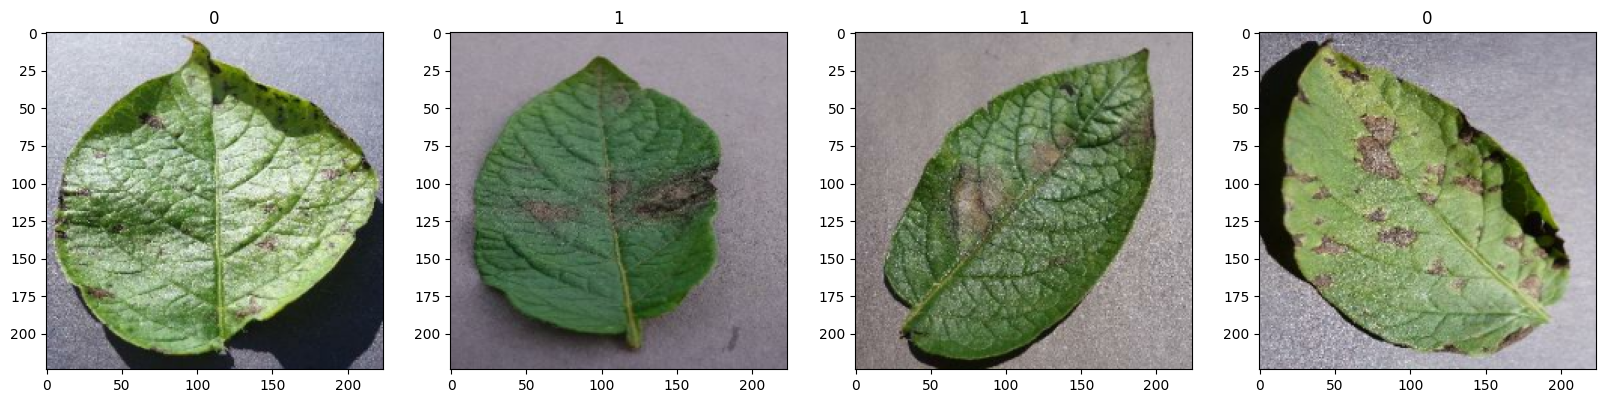

In [16]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for indx, image in enumerate(batch[0][:4]):
  ax[indx].imshow(image.astype('int'))
  ax[indx].title.set_text(batch[1][indx])

##**Preprocessing Data**

In [17]:
# Train data scaling
train_data = train_data.map(lambda x, y: (x/255, y))

In [18]:
scaled_train_data_iterator = train_data.as_numpy_iterator()
scaled_batch = scaled_train_data_iterator.next()

In [19]:
scaled_batch[0][0]

array([[[0.73387355, 0.71034414, 0.7260304 ],
        [0.7165266 , 0.6929972 , 0.7086835 ],
        [0.709984  , 0.68645453, 0.70214087],
        ...,
        [0.7161465 , 0.68869555, 0.7161465 ],
        [0.72675073, 0.69929975, 0.72675073],
        [0.74133676, 0.7138858 , 0.74133676]],

       [[0.75810325, 0.73457384, 0.7502601 ],
        [0.73911566, 0.71558625, 0.7312725 ],
        [0.7319328 , 0.7084034 , 0.7240897 ],
        ...,
        [0.7300521 , 0.70260113, 0.7300521 ],
        [0.7207282 , 0.69327724, 0.7207282 ],
        [0.70514184, 0.67769086, 0.70514184]],

       [[0.7637855 , 0.7402561 , 0.75594234],
        [0.7546819 , 0.7311525 , 0.74683875],
        [0.75422174, 0.7306923 , 0.7463786 ],
        ...,
        [0.70614237, 0.6786914 , 0.70614237],
        [0.69871944, 0.67126846, 0.69871944],
        [0.70582247, 0.6783715 , 0.70582247]],

       ...,

       [[0.5923173 , 0.54525846, 0.56094474],
        [0.54941964, 0.5023609 , 0.5180471 ],
        [0.5358741 , 0

In [20]:
tf.reduce_min(scaled_batch[0][0]), tf.reduce_max(scaled_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9652263>)

In [21]:
test_data = test_data.map(lambda x, y: (x/255, y))
scaled_test_iterator = test_data.as_numpy_iterator()
scaled_test_batch = scaled_test_iterator.next()

In [22]:
scaled_test_batch[0][0]

array([[[0.7153262 , 0.6917968 , 0.6996399 ],
        [0.7319728 , 0.7084434 , 0.71628654],
        [0.7434174 , 0.719888  , 0.7277311 ],
        ...,
        [0.7405566 , 0.73271346, 0.74447817],
        [0.75046015, 0.742617  , 0.7543817 ],
        [0.72593   , 0.71808684, 0.72985154]],

       [[0.72468984, 0.70116043, 0.70900357],
        [0.7208484 , 0.6973189 , 0.7051621 ],
        [0.71820724, 0.6946778 , 0.70252097],
        ...,
        [0.7398761 , 0.73203295, 0.74379766],
        [0.7552022 , 0.74735904, 0.75912374],
        [0.75852346, 0.7506803 , 0.76244503]],

       [[0.7403361 , 0.7168067 , 0.72464985],
        [0.72240895, 0.69887954, 0.7067227 ],
        [0.7095838 , 0.6860544 , 0.69389755],
        ...,
        [0.7264905 , 0.71864736, 0.73041207],
        [0.7403763 , 0.73253316, 0.74429786],
        [0.76068455, 0.7528414 , 0.7646061 ]],

       ...,

       [[0.5876551 , 0.5562826 , 0.54843944],
        [0.5927973 , 0.56142473, 0.5535816 ],
        [0.5618447 , 0

In [23]:
tf.reduce_min(scaled_test_batch[0][0]), tf.reduce_max(scaled_test_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.95457935>)

##**Setting up TensorBoard Callback**

In [24]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir = log_dir
  )
  print(f'Saving Tensorboard log files to: {log_dir}')
  return tensorboard_callback

##**Model Building**

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.layers.experimental import preprocessing

In [26]:
model1 = Sequential()

# Data Augmentation layer
model1.add(preprocessing.RandomRotation(0.2))
model1.add(preprocessing.RandomZoom(0.2))
model1.add(preprocessing.RandomFlip('horizontal_and_vertical'))

model1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

model1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

model1.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

model1.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

model1.add(Flatten())
model1.add(Dense(256, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(128, activation = 'relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))
model1.add(Dense(3, activation = 'softmax'))

In [27]:
model1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [28]:
history1 = model1.fit(train_data,
                      epochs = 20,
                      batch_size = 32,
                      validation_data = test_data,
                      callbacks = [create_tensorboard_callback(dir_name = 'Potato-Leave-Classification',
                                                               experiment_name = 'Model1')])

Saving Tensorboard log files to: Potato-Leave-Classification/Model1/20231024-145148
Epoch 1/20
29/29 [==============================] - 20s 84ms/step - loss: 0.6385 - accuracy: 0.7644 - val_loss: 1.8082 - val_accuracy: 0.3333
Epoch 2/20
29/29 [==============================] - 2s 64ms/step - loss: 0.3265 - accuracy: 0.8789 - val_loss: 4.9776 - val_accuracy: 0.3333
Epoch 3/20
29/29 [==============================] - 3s 91ms/step - loss: 0.3307 - accuracy: 0.8889 - val_loss: 1.7064 - val_accuracy: 0.5100
Epoch 4/20
29/29 [==============================] - 2s 63ms/step - loss: 0.3111 - accuracy: 0.8867 - val_loss: 4.2521 - val_accuracy: 0.3333
Epoch 5/20
29/29 [==============================] - 2s 65ms/step - loss: 0.2694 - accuracy: 0.8989 - val_loss: 1.6804 - val_accuracy: 0.6633
Epoch 6/20
29/29 [==============================] - 2s 71ms/step - loss: 0.2439 - accuracy: 0.9156 - val_loss: 6.6415 - val_accuracy: 0.5033
Epoch 7/20
29/29 [==============================] - 2s 71ms/step - lo

In [30]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (None, 224, 224, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9

##**Transfer Learning: InceptionResNetV2**

In [36]:
from tensorflow.keras.applications import InceptionResNetV2
inception_resnet_convbase = InceptionResNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

219055592/219055592 [==============================] - 5s 0us/step


In [37]:
# Freezing all the layers
for layer in inception_resnet_convbase.layers:
  layer.trainable = False

In [38]:
data_augmentation_layer = Sequential([
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomFlip('horizontal_and_vertical')
])

In [40]:
input_layer = tf.keras.layers.Input(shape = (224, 224, 3))
x = data_augmentation_layer(input_layer)
x = inception_resnet_convbase(x, training = False)
x = Flatten()(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation = 'softmax')(x)

inception_resnet_model = Model(input_layer, output)

In [47]:
inception_resnet_model.compile(loss = 'SparseCategoricalCrossentropy',
                               optimizer = 'Adam',
                               metrics = ['accuracy'])

In [48]:
inception_resnet_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 38400)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               9830656   
                                                                 
 batch_normalization_207 (B  (None, 256)               1024      
 atchNormalization)                                        

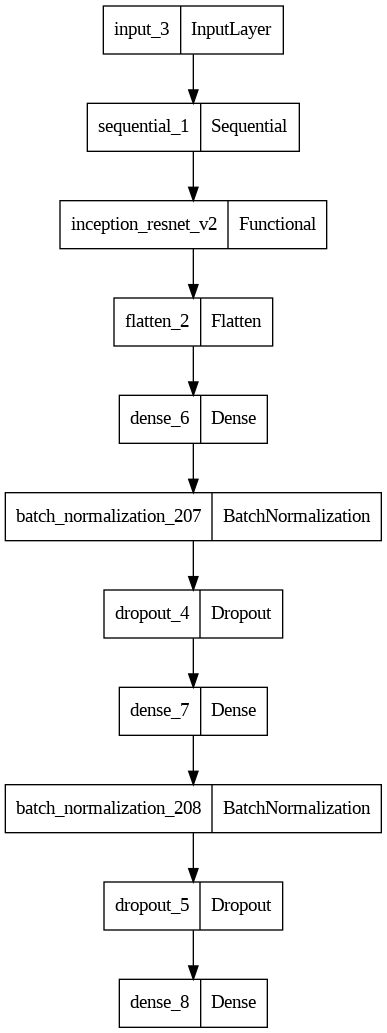

In [55]:
inception_plot = tf.keras.utils.plot_model(inception_resnet_model)
inception_plot

In [49]:
history_inception_resnet = inception_resnet_model.fit(
    train_data,
    epochs = 25,
    batch_size = 32,
    validation_data = test_data,
    callbacks = [create_tensorboard_callback(dir_name = 'Potato-Leave-Classification',
                                             experiment_name = 'inceptionResNetV2')]
)

Saving Tensorboard log files to: Potato-Leave-Classification/inceptionResNetV2/20231024-150656
Epoch 1/25
29/29 [==============================] - 31s 526ms/step - loss: 0.7917 - accuracy: 0.7067 - val_loss: 0.7065 - val_accuracy: 0.7533
Epoch 2/25
29/29 [==============================] - 7s 246ms/step - loss: 0.4462 - accuracy: 0.8311 - val_loss: 0.4477 - val_accuracy: 0.8633
Epoch 3/25
29/29 [==============================] - 7s 239ms/step - loss: 0.3847 - accuracy: 0.8444 - val_loss: 0.3744 - val_accuracy: 0.8833
Epoch 4/25
29/29 [==============================] - 7s 237ms/step - loss: 0.3564 - accuracy: 0.8778 - val_loss: 0.2775 - val_accuracy: 0.9067
Epoch 5/25
29/29 [==============================] - 8s 279ms/step - loss: 0.3193 - accuracy: 0.8789 - val_loss: 0.4936 - val_accuracy: 0.7967
Epoch 6/25
29/29 [==============================] - 7s 250ms/step - loss: 0.2790 - accuracy: 0.8967 - val_loss: 0.1844 - val_accuracy: 0.9300
Epoch 7/25
29/29 [==============================] - 

##**Transfer Learning : ResNet50**

In [52]:
from tensorflow.keras.applications import Xception
xception_convbase = Xception(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

83683744/83683744 [==============================] - 1s 0us/step


In [53]:
# Freezing all the layers
for layer in xception_convbase.layers:
  layer.trainable = False

In [59]:
input_layer = tf.keras.layers.Input(shape = (224, 224, 3))
x = data_augmentation_layer(input_layer)
x = xception_convbase(x, training = False)
x = Flatten()(x)
x = Dense(256, activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
output = Dense(3, activation = 'softmax')(x)

xception_model = Model(input_layer, output)

In [60]:
xception_model.compile(loss = 'SparseCategoricalCrossentropy',
                       optimizer = 'Adam',
                       metrics = ['accuracy'])

In [61]:
xception_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_12 (Dense)            (None, 256)               25690368  
                                                                 
 batch_normalization_215 (B  (None, 256)               1024      
 atchNormalization)                                              
                                                           

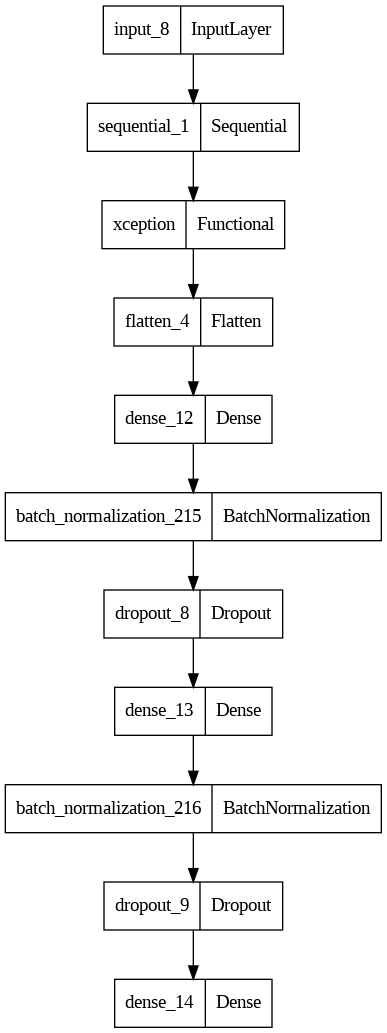

In [64]:
xception_model_plot = tf.keras.utils.plot_model(xception_model)
xception_model_plot

In [65]:
history_xception = xception_model.fit(
    train_data,
    epochs = 25,
    batch_size = 32,
    validation_data = test_data,
    callbacks = [create_tensorboard_callback(dir_name = 'Potato-Leave-Classification',
                                             experiment_name = 'xception_model')]
)

Saving Tensorboard log files to: Potato-Leave-Classification/xception_model/20231024-152011
Epoch 1/25
29/29 [==============================] - 15s 267ms/step - loss: 0.6192 - accuracy: 0.7744 - val_loss: 1.2176 - val_accuracy: 0.7400
Epoch 2/25
29/29 [==============================] - 6s 201ms/step - loss: 0.3213 - accuracy: 0.8767 - val_loss: 0.2721 - val_accuracy: 0.9167
Epoch 3/25
29/29 [==============================] - 6s 202ms/step - loss: 0.3234 - accuracy: 0.8756 - val_loss: 0.2048 - val_accuracy: 0.9300
Epoch 4/25
29/29 [==============================] - 7s 216ms/step - loss: 0.2867 - accuracy: 0.8878 - val_loss: 0.2445 - val_accuracy: 0.9200
Epoch 5/25
29/29 [==============================] - 7s 245ms/step - loss: 0.2384 - accuracy: 0.9089 - val_loss: 0.1421 - val_accuracy: 0.9467
Epoch 6/25
29/29 [==============================] - 6s 202ms/step - loss: 0.2503 - accuracy: 0.9133 - val_loss: 0.1409 - val_accuracy: 0.9467
Epoch 7/25
29/29 [==============================] - 7s 

##**Model Evaluating**

### Model1

In [68]:
result_model1 = model1.evaluate(test_data)
result_model1

10/10 [==============================] - 1s 24ms/step - loss: 0.7073 - accuracy: 0.7800


[0.7073484063148499, 0.7799999713897705]

<Axes: >

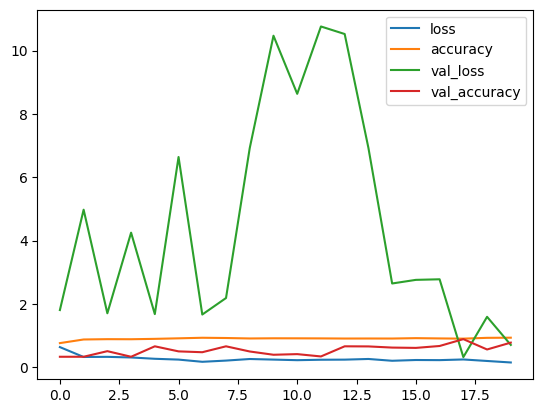

In [69]:
pd.DataFrame(history1.history).plot()

##**Inception Resnet V2**

In [70]:
results_inception_resnet = inception_resnet_model.evaluate(test_data)
results_inception_resnet

10/10 [==============================] - 2s 186ms/step - loss: 0.2400 - accuracy: 0.9067


[0.2399538904428482, 0.9066666960716248]

<Axes: >

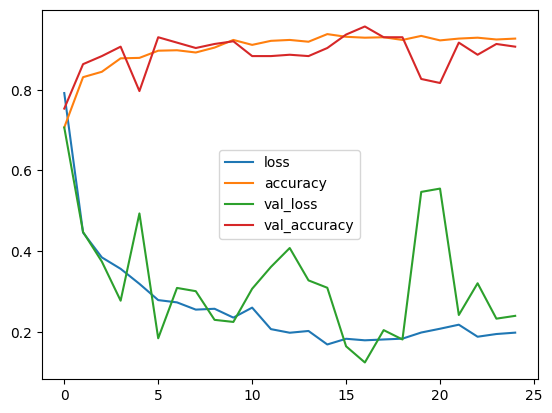

In [72]:
pd.DataFrame(history_inception_resnet.history).plot()

##**Xception**

In [73]:
results_xception = xception_model.evaluate(test_data)
results_xception

10/10 [==============================] - 2s 155ms/step - loss: 0.1746 - accuracy: 0.9367


[0.1746232509613037, 0.9366666674613953]

<Axes: >

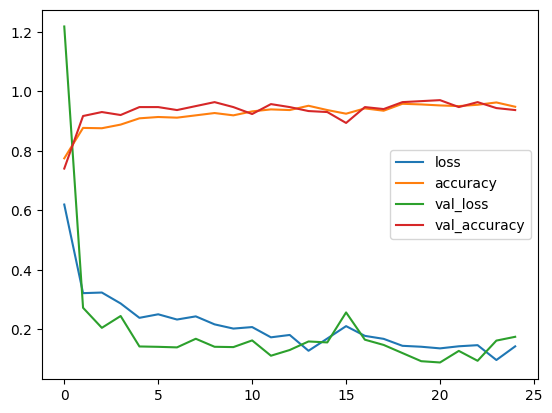

In [74]:
pd.DataFrame(history_xception.history).plot()

##**Comparing the model results**

In [89]:
import pandas as pd
compare_model = pd.DataFrame([result_model1, results_inception_resnet, results_xception])
compare_model = compare_model.rename(columns={0: 'Loss', 1: 'Accuracy'})
compare_model = compare_model.rename(index={0: 'model1', 1: 'inception_resnet_model', 2: 'xception_model'})
compare_model

,Loss,Accuracy
model1,0.707348,0.780000
inception_resnet_model,0.239954,0.906667
xception_model,0.174623,0.936667


##**Viewing our results on TensorBoard**

In [90]:
# Upload experiment results to TensorBoard (uncomment to run)
!tensorboard dev upload --logdir ./Potato-Leave-Classification\
  --name "Potato Leaf Disease Prediction" \
  --description "Deep CNN model for classifying potato leaves into Early and Late Blight and Healthy" \
  --one_shot

2023-10-24 15:41:59.880315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-24 15:41:59.880382: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-24 15:41:59.880445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-24 15:42:01.031266: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./Potato-Leave-Classification

This TensorBoard will be visible to everyone. Do not upload sensitive
data

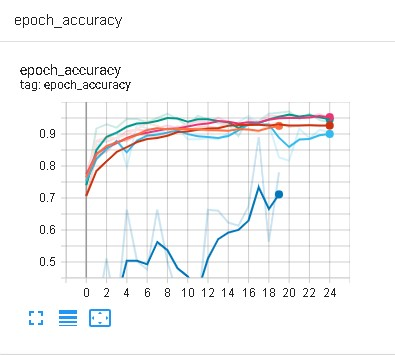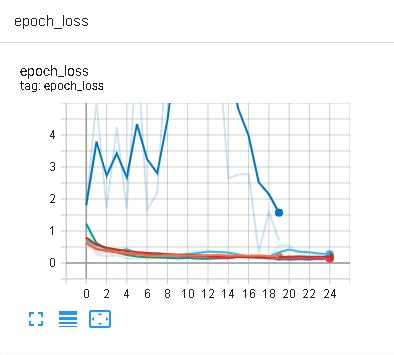

##**Making Prediction on Validation Generator**

In [94]:
validation_iterator = val_data.as_numpy_iterator()
val_batch = validation_iterator.next()

In [95]:
val_batch[0][0]

array([[[169.21939, 147.21939, 150.21939],
        [167.94388, 145.94388, 148.94388],
        [165.43367, 143.43367, 146.43367],
        ...,
        [156.12756, 135.12756, 140.12756],
        [162.47453, 141.47453, 146.47453],
        [165.07144, 144.07144, 149.07144]],

       [[185.57143, 163.57143, 166.57143],
        [185.44899, 163.44899, 166.44899],
        [185.07654, 163.07654, 166.07654],
        ...,
        [150.57649, 129.57649, 134.57649],
        [153.33678, 132.33678, 137.33678],
        [155.42859, 134.42859, 139.42859]],

       [[182.57143, 160.57143, 163.57143],
        [182.70918, 160.70918, 163.70918],
        [183.44388, 161.44388, 164.44388],
        ...,
        [158.43364, 137.43364, 142.43364],
        [162.50514, 141.50514, 146.50514],
        [163.86224, 142.86224, 147.86224]],

       ...,

       [[183.     , 151.     , 154.     ],
        [183.     , 151.     , 154.     ],
        [183.     , 151.     , 154.     ],
        ...,
        [156.58672, 131.58

In [96]:
tf.reduce_min(val_batch[0][0]), tf.reduce_max(val_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=254.05614>)

In [97]:
# Normalizing Data
validation_data = val_data.map(lambda x, y: (x/255, y))
scaled_val_data = validation_data.as_numpy_iterator()
scaled_val_batch = scaled_val_data.next()

In [98]:
scaled_val_batch[0][0]

array([[[0.7385954 , 0.715066  , 0.72290915],
        [0.7462185 , 0.7226891 , 0.7305322 ],
        [0.727471  , 0.7039416 , 0.7117847 ],
        ...,
        [0.77442974, 0.7548219 , 0.7430572 ],
        [0.7842738 , 0.76466596, 0.75290126],
        [0.80144083, 0.781833  , 0.7700683 ]],

       [[0.7432373 , 0.7197079 , 0.72755104],
        [0.7387355 , 0.7152061 , 0.7230492 ],
        [0.72641057, 0.70288116, 0.7107243 ],
        ...,
        [0.78427356, 0.7646657 , 0.752901  ],
        [0.780012  , 0.76040417, 0.74863946],
        [0.78633463, 0.7667268 , 0.7549621 ]],

       [[0.7279112 , 0.70438176, 0.7122249 ],
        [0.7157463 , 0.6922169 , 0.70006   ],
        [0.71846735, 0.69493794, 0.7027811 ],
        ...,
        [0.7922769 , 0.7726691 , 0.7609044 ],
        [0.79209685, 0.772489  , 0.7607243 ],
        [0.7931973 , 0.77358943, 0.7618247 ]],

       ...,

       [[0.5660863 , 0.5307922 , 0.5425569 ],
        [0.56716686, 0.53187275, 0.54363745],
        [0.5830333 , 0

In [99]:
tf.reduce_min(scaled_val_batch[0][0]), tf.reduce_max(scaled_val_batch[0][0])

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.98761314>)

In [100]:
# Making Predictions InceptionResnetV2
results_inception_resnet_validation = inception_resnet_model.evaluate(validation_data)
results_inception_resnet_validation

10/10 [==============================] - 2s 184ms/step - loss: 0.2472 - accuracy: 0.9000


[0.24720540642738342, 0.8999999761581421]

In [102]:
# Making Predictions Model1 CNN
results_validation1 = model1.evaluate(validation_data)
results_validation1

10/10 [==============================] - 0s 21ms/step - loss: 0.8243 - accuracy: 0.7167


[0.8242517709732056, 0.7166666388511658]

In [103]:
# Making Predicitons using Xception
results_xception_val = xception_model.evaluate(validation_data)
results_xception_val

10/10 [==============================] - 2s 149ms/step - loss: 0.1177 - accuracy: 0.9533


[0.11770016700029373, 0.95333331823349]

##**Making a predict function for testing model with custom images**

In [107]:
class_names = ['Early Blight', 'Late Blight', 'Healthy']
def predictions(img_path, img_size = 224):
  img = tf.io.read_file(img_path)
  decode_img = tf.io.decode_image(img)
  resized_img = tf.image.resize(decode_img, [img_size, img_size])
  input_tensor = tf.cast(resized_img/255., dtype = tf.float32)
  y_pred = model1.predict(tf.expand_dims(input_tensor, axis = 0))
  plt.imshow(input_tensor)
  plt.title(f'{class_names[tf.squeeze(np.argmax(y_pred, axis=1))]} \n Probability : {tf.reduce_max(y_pred)}')

1/1 [==============================] - 0s 22ms/step


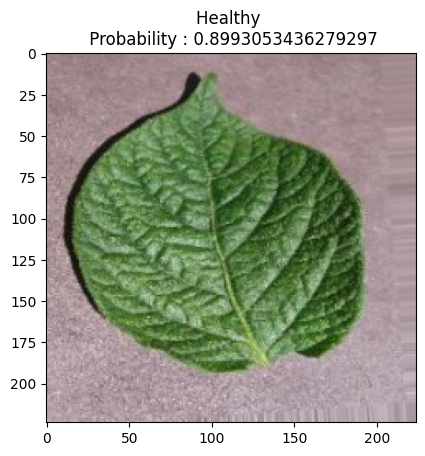

In [108]:
predictions('/content/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_6188.jpg')

1/1 [==============================] - 0s 41ms/step


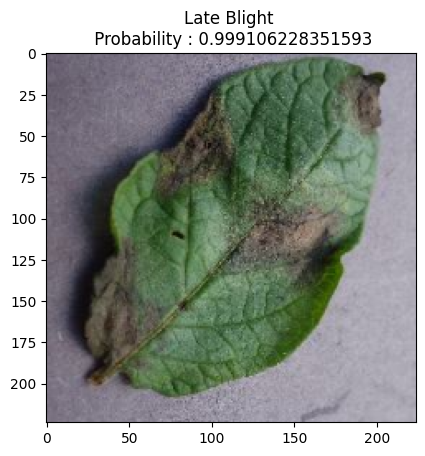

In [109]:
predictions('/content/Potato/Valid/Potato___Late_blight/a0c129b8-4fb3-406d-b2f6-1309fec50c70___RS_LB 5139.JPG')

1/1 [==============================] - 0s 35ms/step


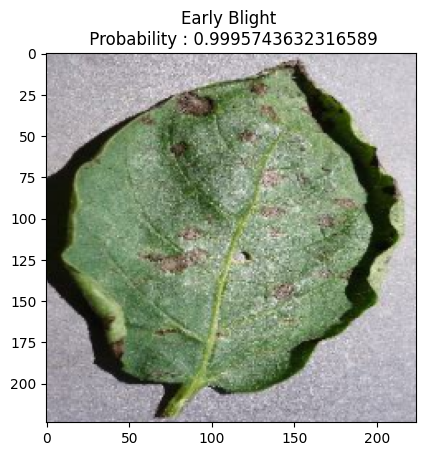

In [110]:
predictions('/content/Potato/Valid/Potato___Early_blight/82927769-4d4a-4f19-a806-a02f435ad17d___RS_Early.B 7886.JPG')

##**Saving Our model**

In [111]:
xception_model.save('Potato_Leaf_Disease_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
